In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import zipfile
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Read the data 
df = pd.read_csv('movies.csv')

In [3]:
# Regroupped columns to bring columns of more interest first 
df = df.reindex(columns=['name', 'genre', 'budget', 'gross','company','country', 'runtime', 'director', 'writer', 'star',  'rating', 'year', 'released', 'score', 'votes'])


In [4]:
# lets look at the data 
df.head()

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes
0,The Shining,Drama,19000000.0,46998772.0,Warner Bros.,United Kingdom,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,R,1980,"June 13, 1980 (United States)",8.4,927000.0
1,The Blue Lagoon,Adventure,4500000.0,58853106.0,Columbia Pictures,United States,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,R,1980,"July 2, 1980 (United States)",5.8,65000.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,18000000.0,538375067.0,Lucasfilm,United States,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0
3,Airplane!,Comedy,3500000.0,83453539.0,Paramount Pictures,United States,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,PG,1980,"July 2, 1980 (United States)",7.7,221000.0
4,Caddyshack,Comedy,6000000.0,39846344.0,Orion Pictures,United States,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,R,1980,"July 25, 1980 (United States)",7.3,108000.0


In [5]:
# Lets check the number of rows and columns
df.shape

(7668, 15)

In [6]:
# check fo rnull values
df.isnull().sum()

name           0
genre          0
budget      2171
gross        189
company       17
country        3
runtime        4
director       0
writer         3
star           1
rating        77
year           0
released       2
score          3
votes          3
dtype: int64

In [7]:
# Check avg numberfor missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} {:2f}%'.format(col, pct_missing))

name 0.000000%
genre 0.000000%
budget 0.283125%
gross 0.024648%
company 0.002217%
country 0.000391%
runtime 0.000522%
director 0.000000%
writer 0.000391%
star 0.000130%
rating 0.010042%
year 0.000000%
released 0.000261%
score 0.000391%
votes 0.000391%


In [8]:
# lets drop null values
df.dropna(inplace=True)

In [9]:
# check the number of columns and rows again to confirm dropped missing values
df.shape

(5421, 15)

In [10]:
# Check data types
df.dtypes

name         object
genre        object
budget      float64
gross       float64
company      object
country      object
runtime     float64
director     object
writer       object
star         object
rating       object
year          int64
released     object
score       float64
votes       float64
dtype: object

In [11]:
#change data type for gross and budget columnsto int 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
# Lets read the fisrt 5 rows to confirm change of data types
df.head()

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes
0,The Shining,Drama,19000000,46998772,Warner Bros.,United Kingdom,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,R,1980,"June 13, 1980 (United States)",8.4,927000.0
1,The Blue Lagoon,Adventure,4500000,58853106,Columbia Pictures,United States,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,R,1980,"July 2, 1980 (United States)",5.8,65000.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,18000000,538375067,Lucasfilm,United States,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0
3,Airplane!,Comedy,3500000,83453539,Paramount Pictures,United States,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,PG,1980,"July 2, 1980 (United States)",7.7,221000.0
4,Caddyshack,Comedy,6000000,39846344,Orion Pictures,United States,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,R,1980,"July 25, 1980 (United States)",7.3,108000.0


In [13]:
# lets get year from released date
df['yearcorrect'] =  df['released'].astype(str).str.split(',').str[1].str[:5].str.strip().astype('float').astype('Int64')

In [14]:
#Confirm the creation and change of data type of yearcorrect columns
df['yearcorrect'].dtype

Int64Dtype()

In [15]:
df.head()

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
0,The Shining,Drama,19000000,46998772,Warner Bros.,United Kingdom,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,R,1980,"June 13, 1980 (United States)",8.4,927000.0,1980
1,The Blue Lagoon,Adventure,4500000,58853106,Columbia Pictures,United States,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,R,1980,"July 2, 1980 (United States)",5.8,65000.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,Action,18000000,538375067,Lucasfilm,United States,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0,1980
3,Airplane!,Comedy,3500000,83453539,Paramount Pictures,United States,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,PG,1980,"July 2, 1980 (United States)",7.7,221000.0,1980
4,Caddyshack,Comedy,6000000,39846344,Orion Pictures,United States,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,R,1980,"July 25, 1980 (United States)",7.3,108000.0,1980


In [16]:
#Sort values to see which of the movies had highest gross earnings
df_sorted_by_gross = df.sort_values(by=['gross'], inplace=False, ascending=False)
df_sorted_by_gross

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
5445,Avatar,Action,237000000,2847246203,Twentieth Century Fox,United States,162.0,James Cameron,James Cameron,Sam Worthington,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,2009
7445,Avengers: Endgame,Action,356000000,2797501328,Marvel Studios,United States,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,2019
3045,Titanic,Drama,200000000,2201647264,Twentieth Century Fox,United States,194.0,James Cameron,James Cameron,Leonardo DiCaprio,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,1997
6663,Star Wars: Episode VII - The Force Awakens,Action,245000000,2069521700,Lucasfilm,United States,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,2015
7244,Avengers: Infinity War,Action,321000000,2048359754,Marvel Studios,United States,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,Drama,3000000,5073,Two Prong Lesson,United States,96.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,R,2009,"January 15, 2015 (Sweden)",5.8,3500.0,2015
2434,Philadelphia Experiment II,Action,5000000,2970,Trimark Pictures,United States,97.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,PG-13,1993,"June 4, 1994 (South Korea)",4.5,1900.0,1994
3681,Ginger Snaps,Drama,5000000,2554,Copperheart Entertainment,Canada,108.0,John Fawcett,Karen Walton,Emily Perkins,Not Rated,2000,"May 11, 2001 (Canada)",6.8,43000.0,2001
272,Parasite,Horror,800000,2270,Embassy Pictures,United States,85.0,Charles Band,Alan J. Adler,Robert Glaudini,R,1982,"March 12, 1982 (United States)",3.9,2300.0,1982


> We can observe that the top 5 movies by gross also had very high budgets 

In [17]:
# check and drop duplicates
df.duplicated().sum()

0

In [18]:
# Check data
df

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
0,The Shining,Drama,19000000,46998772,Warner Bros.,United Kingdom,146.0,Stanley Kubrick,Stephen King,Jack Nicholson,R,1980,"June 13, 1980 (United States)",8.4,927000.0,1980
1,The Blue Lagoon,Adventure,4500000,58853106,Columbia Pictures,United States,104.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,R,1980,"July 2, 1980 (United States)",5.8,65000.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,Action,18000000,538375067,Lucasfilm,United States,124.0,Irvin Kershner,Leigh Brackett,Mark Hamill,PG,1980,"June 20, 1980 (United States)",8.7,1200000.0,1980
3,Airplane!,Comedy,3500000,83453539,Paramount Pictures,United States,88.0,Jim Abrahams,Jim Abrahams,Robert Hays,PG,1980,"July 2, 1980 (United States)",7.7,221000.0,1980
4,Caddyshack,Comedy,6000000,39846344,Orion Pictures,United States,98.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,R,1980,"July 25, 1980 (United States)",7.3,108000.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,Action,90000000,426505244,Columbia Pictures,United States,124.0,Adil El Arbi,Peter Craig,Will Smith,R,2020,"January 17, 2020 (United States)",6.6,140000.0,2020
7649,Sonic the Hedgehog,Action,85000000,319715683,Paramount Pictures,United States,99.0,Jeff Fowler,Pat Casey,Ben Schwartz,PG,2020,"February 14, 2020 (United States)",6.5,102000.0,2020
7650,Dolittle,Adventure,175000000,245487753,Universal Pictures,United States,101.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,PG,2020,"January 17, 2020 (United States)",5.6,53000.0,2020
7651,The Call of the Wild,Adventure,135000000,111105497,20th Century Studios,Canada,100.0,Chris Sanders,Michael Green,Harrison Ford,PG,2020,"February 21, 2020 (United States)",6.8,42000.0,2020


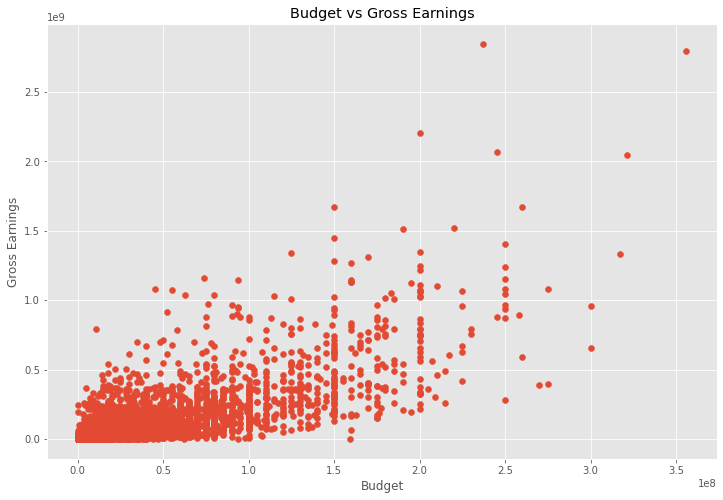

In [19]:
# lets build a scatter plot with budget and gross columns
plt.scatter(x=df['budget'],  y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

> There is some form of correlation but we are not sure 
> We would have to use regplot from seaborn

In [20]:
df_sorted_by_gross

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
5445,Avatar,Action,237000000,2847246203,Twentieth Century Fox,United States,162.0,James Cameron,James Cameron,Sam Worthington,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,2009
7445,Avengers: Endgame,Action,356000000,2797501328,Marvel Studios,United States,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,2019
3045,Titanic,Drama,200000000,2201647264,Twentieth Century Fox,United States,194.0,James Cameron,James Cameron,Leonardo DiCaprio,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,1997
6663,Star Wars: Episode VII - The Force Awakens,Action,245000000,2069521700,Lucasfilm,United States,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,2015
7244,Avengers: Infinity War,Action,321000000,2048359754,Marvel Studios,United States,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,Drama,3000000,5073,Two Prong Lesson,United States,96.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,R,2009,"January 15, 2015 (Sweden)",5.8,3500.0,2015
2434,Philadelphia Experiment II,Action,5000000,2970,Trimark Pictures,United States,97.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,PG-13,1993,"June 4, 1994 (South Korea)",4.5,1900.0,1994
3681,Ginger Snaps,Drama,5000000,2554,Copperheart Entertainment,Canada,108.0,John Fawcett,Karen Walton,Emily Perkins,Not Rated,2000,"May 11, 2001 (Canada)",6.8,43000.0,2001
272,Parasite,Horror,800000,2270,Embassy Pictures,United States,85.0,Charles Band,Alan J. Adler,Robert Glaudini,R,1982,"March 12, 1982 (United States)",3.9,2300.0,1982


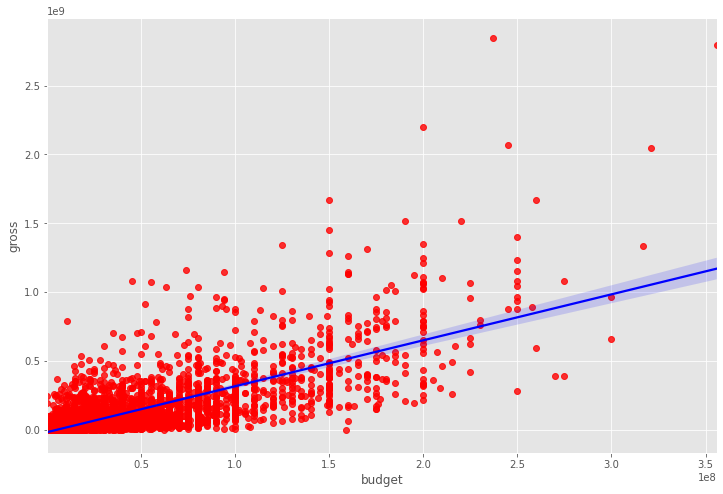

In [21]:
# plot a regplot for see corelation
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'});

> We can confirm there is correlation between gross and budget

In [22]:
# lets start looking at correlation  between columns

In [23]:
#by default the coor() uses the pearson's correlation
df.corr(method='pearson')

,budget,gross,runtime,year,score,votes,yearcorrect
budget,1.000000,0.740247,0.318695,0.327722,0.072001,0.439675,0.319669
gross,0.740247,1.000000,0.275796,0.274321,0.222556,0.614751,0.268141
runtime,0.318695,0.275796,1.000000,0.075077,0.414068,0.352303,0.075183
year,0.327722,0.274321,0.075077,1.000000,0.056386,0.206021,0.998962
score,0.072001,0.222556,0.414068,0.056386,1.000000,0.474256,0.061443
votes,0.439675,0.614751,0.352303,0.206021,0.474256,1.000000,0.202215
yearcorrect,0.319669,0.268141,0.075183,0.998962,0.061443,0.202215,1.000000


> There is a high corelation of **0.740247** between between gross earnings and budget

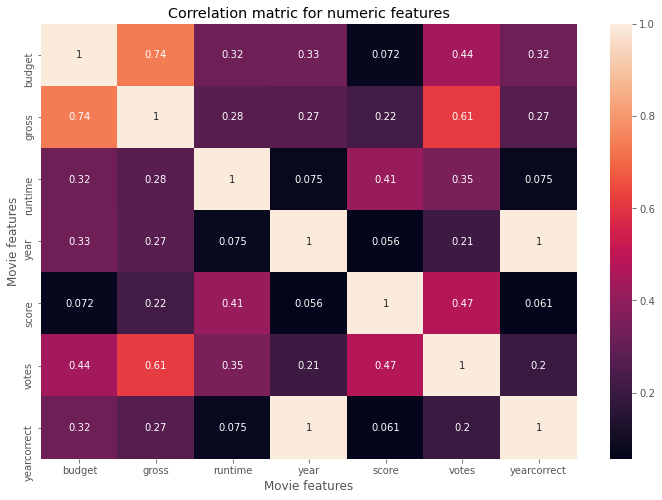

In [24]:
# lets create a variable to hold the correaltion between all numerical values 
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show();

> From the above heatmap we can also see there is a strong correlation of **0.61** between votes and gross

In [25]:
# lets create dataframe where columns with object data types have cateforized using random numerical values
df_categorized = df
for col in df_categorized.columns:
    if (df_categorized[col].dtype == 'object'):
        df_categorized[col] = df_categorized[col].astype('category')
        df_categorized[col] = df_categorized[col].cat.codes
        
# lets sort them by gross to be able to confirm change with the df_sorted_by_gross dataframe        
df_categorized.sort_values(by='gross', ascending=False)  

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
5445,386,0,237000000,2847246203,1382,47,162.0,785,1263,1534,5,2009,527,7.8,1100000.0,2009
7445,388,0,356000000,2797501328,983,47,181.0,105,513,1470,5,2019,137,8.4,903000.0,2019
3045,4909,6,200000000,2201647264,1382,47,194.0,785,1263,1073,5,1997,534,7.8,1100000.0,1997
6663,3643,0,245000000,2069521700,945,47,138.0,768,1806,356,5,2015,529,7.8,876000.0,2015
7244,389,0,321000000,2048359754,983,47,149.0,105,513,1470,5,2018,145,8.4,897000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,3000000,5073,1385,47,96.0,585,2924,1498,6,2009,890,5.8,3500.0,2015
2434,2969,0,5000000,2970,1376,47,97.0,1805,3102,186,5,1993,1467,4.5,1900.0,1994
3681,1595,6,5000000,2554,466,6,108.0,952,1683,527,3,2000,1721,6.8,43000.0,2001
272,2909,9,800000,2270,582,47,85.0,261,55,1473,6,1982,1525,3.9,2300.0,1982


In [26]:
df_sorted_by_gross

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
5445,Avatar,Action,237000000,2847246203,Twentieth Century Fox,United States,162.0,James Cameron,James Cameron,Sam Worthington,PG-13,2009,"December 18, 2009 (United States)",7.8,1100000.0,2009
7445,Avengers: Endgame,Action,356000000,2797501328,Marvel Studios,United States,181.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2019,"April 26, 2019 (United States)",8.4,903000.0,2019
3045,Titanic,Drama,200000000,2201647264,Twentieth Century Fox,United States,194.0,James Cameron,James Cameron,Leonardo DiCaprio,PG-13,1997,"December 19, 1997 (United States)",7.8,1100000.0,1997
6663,Star Wars: Episode VII - The Force Awakens,Action,245000000,2069521700,Lucasfilm,United States,138.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,PG-13,2015,"December 18, 2015 (United States)",7.8,876000.0,2015
7244,Avengers: Infinity War,Action,321000000,2048359754,Marvel Studios,United States,149.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,PG-13,2018,"April 27, 2018 (United States)",8.4,897000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,Drama,3000000,5073,Two Prong Lesson,United States,96.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,R,2009,"January 15, 2015 (Sweden)",5.8,3500.0,2015
2434,Philadelphia Experiment II,Action,5000000,2970,Trimark Pictures,United States,97.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,PG-13,1993,"June 4, 1994 (South Korea)",4.5,1900.0,1994
3681,Ginger Snaps,Drama,5000000,2554,Copperheart Entertainment,Canada,108.0,John Fawcett,Karen Walton,Emily Perkins,Not Rated,2000,"May 11, 2001 (Canada)",6.8,43000.0,2001
272,Parasite,Horror,800000,2270,Embassy Pictures,United States,85.0,Charles Band,Alan J. Adler,Robert Glaudini,R,1982,"March 12, 1982 (United States)",3.9,2300.0,1982


> Using the first 5 rows we can confirm from the budgets and gross values that categorizing columns with object data types using the numerical values worked.

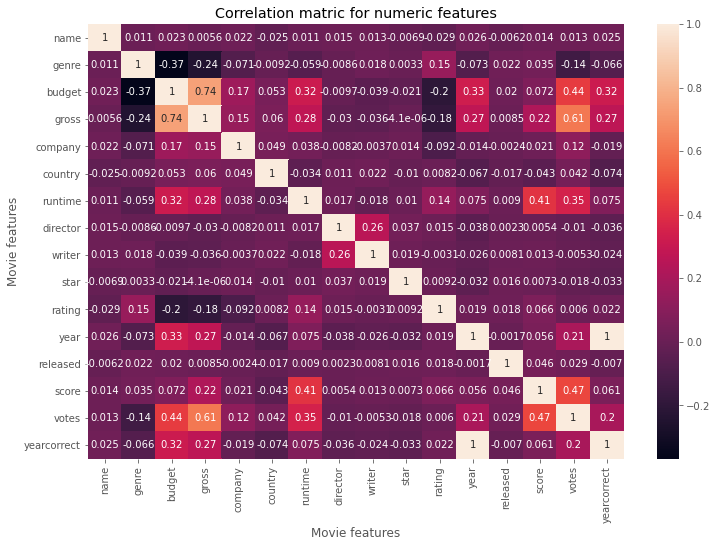

<Figure size 1080x1080 with 0 Axes>

In [27]:
# Now lets plot a heatmap to find out the correlatioon between all of the columns 
correlation_matrix = df_categorized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.figure(figsize=(15, 15))
plt.show();

In [28]:
# let usee .corr() to get raw values for correlation
df_categorized.corr()

,name,genre,budget,gross,company,country,runtime,director,writer,star,rating,year,released,score,votes,yearcorrect
name,1.000000,0.010996,0.023392,0.005639,0.021697,-0.025490,0.010850,0.015246,0.012880,-0.006882,-0.029234,0.025542,-0.006152,0.014450,0.012615,0.025485
genre,0.010996,1.000000,-0.368523,-0.244101,-0.071334,-0.009164,-0.059237,-0.008553,0.017578,0.003341,0.147796,-0.073167,0.022142,0.035106,-0.135990,-0.066049
budget,0.023392,-0.368523,1.000000,0.740247,0.170235,0.052977,0.318695,-0.009662,-0.039466,-0.021473,-0.203946,0.327722,0.019952,0.072001,0.439675,0.319669
gross,0.005639,-0.244101,0.740247,1.000000,0.149553,0.060078,0.275796,-0.029560,-0.035885,-0.000004,-0.181906,0.274321,0.008501,0.222556,0.614751,0.268141
company,0.021697,-0.071334,0.170235,0.149553,1.000000,0.048569,0.037585,-0.008223,-0.003697,0.014082,-0.092357,-0.014333,-0.002407,0.020656,0.118470,-0.019480
country,-0.025490,-0.009164,0.052977,0.060078,0.048569,1.000000,-0.034477,0.011133,0.022488,-0.009990,0.008230,-0.066748,-0.017228,-0.043051,0.041551,-0.074050
runtime,0.010850,-0.059237,0.318695,0.275796,0.037585,-0.034477,1.000000,0.017433,-0.017561,0.010108,0.140792,0.075077,0.008975,0.414068,0.352303,0.075183
director,0.015246,-0.008553,-0.009662,-0.029560,-0.008223,0.011133,0.017433,1.000000,0.261735,0.036593,0.014656,-0.038354,0.002308,0.005413,-0.010376,-0.036303
writer,0.012880,0.017578,-0.039466,-0.035885,-0.003697,0.022488,-0.017561,0.261735,1.000000,0.018520,-0.003149,-0.025908,0.008072,0.012843,-0.005316,-0.024086
star,-0.006882,0.003341,-0.021473,-0.000004,0.014082,-0.009990,0.010108,0.036593,0.018520,1.000000,0.009196,-0.032157,0.015706,0.007296,-0.017638,-0.032944


In [29]:
# lets maximize the number of rows pandas can  display
pd.set_option('display.max_rows', None)

In [30]:
# lets unstack the correlation matrix and pair them 
correlation_mat = df_categorized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             genre          0.010996
             budget         0.023392
             gross          0.005639
             company        0.021697
             country       -0.025490
             runtime        0.010850
             director       0.015246
             writer         0.012880
             star          -0.006882
             rating        -0.029234
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             yearcorrect    0.025485
genre        name           0.010996
             genre          1.000000
             budget        -0.368523
             gross         -0.244101
             company       -0.071334
             country       -0.009164
             runtime       -0.059237
             director      -0.008553
             writer         0.017578
             star           0.003341
             rating         0.147796
 

In [31]:
# lets sort them by the correlation values
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
             gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
yearcorrect  country       -0.074050
country      yearcorrect   -0.074050
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        yearcorrect   -0.066049
yearcorrect  genre         -0.066049
genre        runtime       -0.059237
runtime      genre         -0.059237
country      score         -0.043051
score        country       -0.043051
writer       budget        -0.039466
b

In [32]:
# lets see which pair of columns have the highest correlation
high_corr = sorted_corr_pairs[(sorted_corr_pairs) > 0.5]
high_corr 

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.998962
year         yearcorrect    0.998962
name         name           1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
rating       rating         1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
runtime      runtime        1.000000
country      country        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
genre        genre          1.000000
votes        votes          1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

> Votes and udget have the highest correaltion to gross earnings.